# meta-SNE

In [1]:
import numpy as np
from scipy.spatial.distance import euclidean as distance
from os import listdir
import gc

In [2]:
def distanceMatrix(outputs):
    '''
    outputs -- ordered list of representations for all images
    '''
    distances = []
    for i in range(100):
        for j in range(i+1, 100):
            dist = distance(outputs[i], outputs[j])
            distances.append(dist)
    return distances

# net = 'vgg/'
nets = ['squeezenet/', 'vgg/', 'alexnet/', 'resnet/', 'densenet/']
lengths = []

representations = []
for net in nets:
    print('=========' + net + '=========')
    fileNames = listdir('activation_data/' + net)

    def filterNames(names):
        filtered = []
        for name in names:
            if 'fc' not in name:
                filtered.append(name)
        return filtered

    # fileNames = filterNames(fileNames)

    counter = 0
    for name in fileNames:
        print('Generating ' + name)
        representations.append(distanceMatrix(np.load('activation_data/' + net + name).flatten()))
        gc.collect()
        counter += 1
    lengths.append(counter)

lengths[1] = lengths[1] + lengths[0]
lengths[2] = lengths[2] + lengths[1]
lengths[3] = lengths[3] + lengths[2]
lengths.insert(0, 0)
    
representations = np.stack(representations)
normalizedReps = []
for r in representations:
    norm = np.linalg.norm(r)
    if norm == 0:
        print('ignoring 0 norm')
    else:
        normalizedReps.append(r / (norm ** .5))
representations = normalizedReps

for r in representations:
    print(r)

=========squeezenet/=========
Generating features4squeeze.npy
Generating features9expand1x1_activation.npy
Generating features3expand3x3_activation.npy
Generating features4expand1x1.npy
Generating features12expand3x3_activation.npy
Generating features10expand1x1_activation.npy
Generating features6.npy
Generating features9expand1x1.npy
Generating features.npy
Generating features4expand1x1_activation.npy
Generating features10expand1x1.npy
Generating features2.npy
Generating features7expand1x1.npy
Generating features12expand1x1_activation.npy
Generating features5expand3x3.npy
Generating features8.npy
Generating features8squeeze.npy
Generating features4expand3x3.npy
Generating features9expand3x3.npy
Generating classifier2.npy
Generating features1.npy
Generating features5squeeze.npy
Generating features10squeeze_activation.npy
Generating features11.npy
Generating features3expand3x3.npy
Generating features12expand3x3.npy
Generating features8expand3x3_activation.npy
Generating classifier.npy
G

[t-SNE] Computing pairwise distances...
[t-SNE] Computed conditional probabilities for sample 289 / 289
[t-SNE] Mean sigma: 0.339292
[t-SNE] KL divergence after 250 iterations with early exaggeration: 88.782590
[t-SNE] Error after 15000 iterations: 0.806982


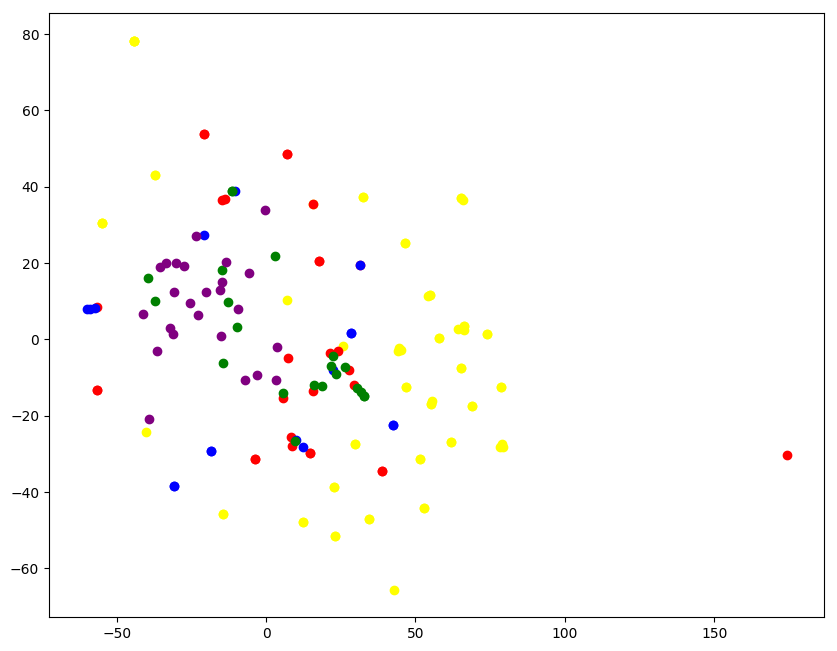

In [12]:
np.save('representations', np.stack(representations))

In [13]:
np.save('lengths', lengths)